# 7. Modern Convolutional Neural Networks

### 7.1 Deep Convolutional Neural Networks (AlexNet)

Although convolutional neural networks were well known in the computer vision and machine learning communities following the introduction of LeNet, they did not immediately dominate the field. Although LeNet achieved good results on early small datasets, the performance and feasability of training convolutional neural nets on larger, more realistic datasets had yet to be established. In fact, for much of the intervening time between the early 1990s and the watershed results of 2012, neural networks were often surpassed by other machine learning methods, such as SVMs.

For computer vision, this comparison is perhaps not fair. That is although the inputs to convolutional networks consist of raw of lightly-processed (e.g., by centering) pixel values, **practitioners would never feed raw pixels into traditional models.** Instead, typical computer vision pipelines consisted of manually engineering feature extraction pipelines. **Rather than learn the features, the features were *crafted***. **Most of the progress came from having more clever ideas for features, and the learning algorithm was often relegated to an afterthought.** 

Although some neural nets accelerators were available in the 1990s, they were not yet sufficiently powerful to make deep multichannel, multilayer convolutional neural nets with a large number of parameters. Moreover, datasets were still relatively small. Added to these obstacles, key tricks for training neural networks including parameter initialization heuristics, clever variants of SGD, non-squashing activation functions, and effective regularization techniques were still missing.

Thus, rather than end-to-end (pixel to classification) systems, classical pipelines looked more like this:

- 1) Obtain an interesting dataset
- 2) Preprocess the dataset with hand-crafted features based on some knowledge of optics, geometry, other analytic tools, and occasionally on the serendipitous discoveries of lucky graduate students.
- 3) Feed the data through a standard set of feature extractors such as *SIFT*, the Scale-Invariant Feature Transform, or *SURF*, the Speeded-Up Robust Features, or any number of hand-tuned pipelines.
- 4) Dump the resulting representations into your favorite classifier, likely a linear model or kernel method, to learn a classifier.

If you spoke to machine learning researchers, they believed that ML was both important and beautiful. Elegant theories proved the properties of various classifiers. The field of machine learning was thriving, rigorous and eminently useful. However, if you spoke to a computer vision researcher, you'd hear a very different story. **The dirty truth of image recognition, they'd tell you, is that FEATURES, not learning algorithms, drove progress. Computer vision researchers justifiably believed that a slightly bigger or cleaner dataset or a slightly improved feature-extraction pipeline mattered far more to the final accuracy than any learning algorithm**.

#### 7.1.1 Learning Feature Representation

Another way to cast the state of affairs is that the most important part of the pipeline was the rep- resentation. And up until 2012 the representation was calculated mechanically. In fact, engineer- ing a new set of feature functions, improving results, and writing up the method was a prominent genre of paper. SIFT, SURF, HOG, Bags of visual words and similar feature extractors ruled the roost.

Another group of researchers, including Yann LeCun, Geoff Hinton, Yoshua Bengio, Andrew Ng, Shun-ichi Amari, and Juergen Schmidhuber, had different plans. **They believed that features themselves ought to be learned. Moreover, they believed that to be reasonably complex, the features ought to be hierarchically composed with multiple jointly learned layers, each with learnable parameters.** In the case of an image, the lowest layers might come to detect edges, colors, and textures. Indeed, (Krizhevsky et al., 2012) proposed a new variant of a convolutional neural network which achieved excellent performance in the ImageNet challenge.

Interestingly in the lowest layers of the network, the model learned feature extractors that resembled some traditional filters.


Higher layers in the network might build upon these representations to represent larger structures, like eyes, noses, blades of grass, etc. Even higher layers might represent whole objects like people, airplanes, dogs, or frisbees. Ultimately, the final hidden state learns a compact representation of the image that summarizes its contents such that data belonging to different categories be separated easily.

While the ultimate breakthrough for many-layered convolutional networks came in 2012, a core group of researchers had dedicated themselves to this idea, attempting to learn hierarchical representations of visual data for many years. The ultimate breakthrough in 2012 can be attributed to two key factors.

##### Missing Ingredient - Data
Deep models with many layers require large amounts of data in order to enter the regime where they significantly outperform traditional methods based on convex optimizations (e.g., linear and kernel methods). However, given the limited storage capacity of computers, the relative expense of sensors, and the comparatively tighter research budgets in the 1990s, most research relied on tiny datasets. Numerous papers addressed the UCI collection of datasets, many of which contained only hundreds or (a few) thousands of images captured in unnatural settings with low resolution.

In 2009, the ImageNet dataset was released, challenging researchers to learn models from 1 million examples, 1,000 each from 1,000 distinct categories of objects. The researchers, led by Fei-Fei Li, who introduced this dataset leveraged Google Image Search to prefilter large candidate sets for each category and employed the Amazon Mechanical Turk crowdsourcing pipeline to confirm for each image whether it belonged to the associated category. This scale was unprecedented. The associated competition, dubbed the ImageNet Challenge pushed computer vision and machine learning research forward, challenging researchers to identify which models performed best at a greater scale than academics had previously considered.

##### Missing Ingredient - Hardware

Deep learning models are voracious consumers of compute cycles. Training can take hundreds of epochs, and each iteration requires passing data through many layers of computationally- expensive linear algebra operations. This is one of the main reasons why in the 90s and early 2000s, simple algorithms based on the more-efficiently optimized convex objectives were preferred.

Graphical processing units (GPUs) proved to be a game changer in make deep learning feasible. These chips had long been developed for accelerating graphics processing to benefit computer games. In particular, they were optimized for high throughput 4x4 matrix-vector products, which are needed for many computer graphics tasks. Fortunately, this math is strikingly similar to that required to calculate convolutional layers. Around that time, NVIDIA and ATI had begun opti- mizing GPUs for general compute operations, going as far as to market them as General Purpose GPUs (GPGPU).

To provide some intuition, consider the cores of a modern microprocessor (CPU). Each of the cores is fairly powerful running at a high clock frequency and sporting large caches (up to several MB of L3). Each core is well-suited to executing a wide range of instructions, with branch predictors, a deep pipeline, and other bells and whistles that enable it to run a large variety of programs. This apparent strength, however, is also its Achilles heel: general purpose cores are very expensive to build. They require lots of chip area, a sophisticated support structure (memory interfaces, caching logic between cores, high speed interconnects, etc.), and they are comparatively bad at any single task. Modern laptops have up to 4 cores, and even high end servers rarely exceed 64 cores, simply because it is not cost effective.

By comparison, GPUs consist of 100-1000 small processing elements (the details differ somewhat between NVIDIA, ATI, ARM and other chip vendors), often grouped into larger groups (NVIDIA calls them warps). While each core is relatively weak, sometimes even running at sub-1GHz clock frequency, it is the total number of such cores that makes GPUs orders of magnitude faster than CPUs. For instance, NVIDIAʼs latest Volta generation offers up to 120 TFlops per chip for specialized instructions (and up to 24 TFlops for more general purpose ones), while floating point performance of CPUs has not exceeded 1 TFlop to date. The reason for why this is possible is actually quite simple: first, power consumption tends to grow quadratically with clock frequency. Hence, for the power budget of a CPU core that runs 4x faster (a typical number), you can use 16 GPU cores at 1/4 the speed, which yields 16 x 1/4 = 4x the performance. Furthermore, GPU cores are much simpler (in fact, for a long time they werenʼt even able to execute general purpose code), which makes them more energy efficient. Last, many operations in deep learning require high memory bandwidth. Again, GPUs shine here with buses that are at least 10x as wide as many CPUs.

Back to 2012. A major breakthrough came when Alex Krizhevsky and Ilya Sutskever implemented a deep convolutional neural network that could run on GPU hardware. They realized that the computational bottlenecks in CNNs (convolutions and matrix multiplications) are all operations that could be parallelized in hardware. Using two NVIDIA GTX 580s with 3GB of memory, they implemented fast convolutions. The code cuda-convnet was good enough that for several years it was the industry standard and powered the first couple years of the deep learning boom.

#### 7.1.2 AlexNet
AlexNet was introduced in 2012, named after Alex Krizhevsky, the first author of the breakthrough ImageNet classification paper (Krizhevsky et al., 2012). AlexNet, which employed an **8-layer convolutional neural network**, won the ImageNet Large Scale Visual Recognition Challenge 2012 by a phenomenally large margin. This network proved, for the first time, that the features obtained by learning can transcend manually-design features, breaking the previous paradigm in computer vision. The architectures of AlexNet and LeNet are very similar, as Fig. 7.1.2 illustrates. Note that we provide a slightly streamlined version of AlexNet removing some of the design quirks that were needed in 2012 to make the model fit on two small GPUs.

The design philosophies of AlexNet and LeNet are very similar, but there are also significant differences. First, AlexNet is much deeper than the comparatively small LeNet5. AlexNet consists of eight layers: five convolutional layers, two fully-connected layers, and one fully-connected output layer. Second, AlexNet used ReLU instead of the sigmoid as its activation function. Let's delve into the details below.

##### Architecture

In AlexNetʼs first layer, the convolution window shape is 11 × 11. Since most images in ImageNet are more than ten times higher and wider than the MNIST images, objects in ImageNet data tend to occupy more pixels. Consequently, a larger convolution window is needed to capture the object. The convolution window shape in the second layer is reduced to 5×5, followed by 3×3. In addition, after the first, second, and fifth convolutional layers, the network adds maximum pooling layers with a window shape of 3 × 3 and a stride of 2. Moreover, AlexNet has ten times more convolution channels than LeNet.


After the last convolutional layer are two fully-connected layers with 4096 outputs. These two huge fully-connected layers produce model parameters of nearly 1 GB. Due to the limited memory in early GPUs, the original AlexNet used a dual data stream design, so that each of their two GPUs could be responsible for storing and computing only its half of the model. Fortunately, GPU mem- ory is comparatively abundant now, so we rarely need to break up models across GPUs these days (our version of the AlexNet model deviates from the original paper in this aspect).

##### Activation Functions


Second, AlexNet changed the sigmoid activation function to a simpler ReLU activation function. On the one hand, the computation of the ReLU activation function is simpler. For example, it does not have the exponentiation operation found in the sigmoid activation function. On the other hand, the ReLU activation function makes model training easier when using different parameter initialization methods. **This is because, when the output of the sigmoid activation function is very close to 0 or 1, the gradient of these regions is almost 0, so that back propagation cannot continue to update some of the model parameters**. In contrast, the gradient of the ReLU activation function in the positive interval is always 1. Therefore, if the model parameters are not properly initialized, the sigmoid function may obtain a gradient of almost 0 in the positive interval, so that the model cannot be effectively trained.

#### Capacity Control and Preprocessing

AlexNet controls the model complexity of the fully-connected layer by dropout (Section 4.6), while LeNet only uses weight decay. To augment the data even further, the training loop of AlexNet added a great deal of image augmentation, such as flipping, clipping, and color changes. This makes the model more robust and the larger sample size effectively reduces overfitting. We will discuss data augmentation in greater detail later.

In [1]:
import d2l
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn

npx.set_np()

In [21]:
net = nn.Sequential()
net.add(nn.Conv2D(96, kernel_size=(11,11), strides = 4, activation='relu'),
        nn.MaxPool2D(pool_size = (3,3), strides = 2),
        nn.Conv2D(256, kernel_size = (5,5), padding = 2, activation='relu'),
        nn.MaxPool2D(pool_size = (3,3), strides = 2),
        nn.Conv2D(384, kernel_size = (3,3), padding = 1, activation='relu'),
        nn.Conv2D(384, kernel_size = (3,3), padding = 1, activation='relu'),
        nn.Conv2D(256, kernel_size = (3,3), padding = 1, activation='relu'),
        nn.MaxPool2D(pool_size = (3,3), strides = 2),
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
        nn.Dense(10)) # We are using Fashion MNIST, so the number of classes is 10,
        # instead of 1000

In [22]:
X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()

for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv30 output shape:	 (1, 96, 54, 54)
pool18 output shape:	 (1, 96, 26, 26)
conv31 output shape:	 (1, 256, 26, 26)
pool19 output shape:	 (1, 256, 12, 12)
conv32 output shape:	 (1, 384, 12, 12)
conv33 output shape:	 (1, 384, 12, 12)
conv34 output shape:	 (1, 256, 12, 12)
pool20 output shape:	 (1, 256, 5, 5)
dense18 output shape:	 (1, 4096)
dropout12 output shape:	 (1, 4096)
dense19 output shape:	 (1, 4096)
dropout13 output shape:	 (1, 4096)
dense20 output shape:	 (1, 10)


#### 7.1.3 Reading the Dataset

Although AlexNet uses ImageNet in the paper, we use Fashion-MNIST here since training an ImageNet model to convergence could take hours or days even on a modern GPU. One of the problems with applying AlexNet directly on Fashion-MNIST is that our images **are lower resolution (28 x 28 pixels)** than ImageNet images. To make things work, we upsample them to 224 x 224 pixels (**generally not a smart practice, but we do it here to be faithful to the AlexNet architecture**). We perform this resizing with the resize argument in `load_data_fashion_mnist`.

In [23]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size, 
                                                    resize=224)

#### 7.1.4 Training

Now, we can star training AlexNet. Compared to LeNet in the previous section, the main change here is the use of a smaller learning rate and much slower training **due to the deeper and wider network, the higher image resolution and the more costly convolutions**.

In [10]:
def evaluate_accuracy_gpu(net, data_iter, ctx = None):
    if not ctx:
        ctx = list(net.collect_params().values())[0].list_ctx()[0]
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        X, y = X.as_in_context(ctx), y.as_in_context(ctx)
        metric.add(d2l.accuracy(net(X), y), y.size)
        
    return metric[0] / metric[1]

In [6]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, ctx = d2l.try_gpu()):
    net.initialize(force_reinit = True, ctx = ctx, init = init.Xavier())
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
    animator = d2l.Animator(xlabel = 'epoch', xlim = [0, num_epochs],
                           legend = ['train loss', 'train acc', 'test acc'])
    timer = d2l.Timer()
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        for i, (X,y) in enumerate(train_iter):
            timer.start()
            X, y = X.as_in_context(ctx), y.as_in_context(ctx)
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y)
            l.backward()
            trainer.step(X.shape[0])
            metric.add(l.sum(), d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_loss, train_acc = metric[0] / metric[2], metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i/ len(train_iter),
                            (train_loss, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print('loss %.3f, train acc %.3f, test acc %.3f' % (train_loss, 
                                                        train_acc, test_acc))
    print('%.1f examples / sec on %s' % (metric[2]*num_epochs/timer.sum(), ctx))

NameError: name 'evaluate_accuracy_gpu' is not defined

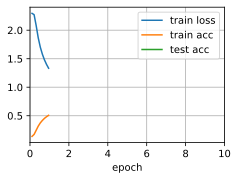

In [25]:
lr, num_epochs = 0.01, 10

train_ch6(net, train_iter, test_iter, num_epochs, lr)

## 7.2 Network Using Blocks (VGG)

While AlexNet proved that deep convolutional neural nets can achieve good results, it did not offer **a general template to guide researchers in designing new networks**. In the following sections introduce several heuristic concepts commonly used to design deep networks.


Progress in this field mirrors that in chip design where engineers went from placing transistors to logical elements to logic blocks. Similarly, the **design of neural network architectures had grown progressively more abstract, with researchers moving from thinking in terms of individual neurons to whole layers, and now to blocks, repeating patterns of layers.**

The idea of using blocks first emerged from the Visual Geometry Group (VGG) at Oxford University. In their eponymously-named VGG network, It is easy to implement these repeated structures in code with any modern deep learning framework by using loops and subroutines.


#### 7.2.1 VGG Blocks

The basic building block of classic convolutional networks is a sequence of the following layers: 
- 1) A convolutional layer (with padding to maintain the resolution), 
- 2) A nonlinearity such as a ReLU, One VGG block consists of a sequence of convolutional layers, followed by a max pooling layer for spatial downsampling.

In the original VGG paper (Simonyan & Zisserman, 2014), the authors employed convolutions with 3 × 3 kernels and 2 × 2 max pooling with stride of 2 (halving the resolution after each block). In the code below, we define a function called `vgg_block` to implement **one** VGG block. The function takes two arguments corresponding to the number of convolutional layers `num_convs` and the number of output channels `num_channels`.

In [3]:
import d2l 
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

In [4]:
def vgg_block(num_convs, num_channels):
    blk = nn.Sequential()
    for _ in range(num_convs):
        blk.add(nn.Conv2D(num_channels, kernel_size=3,
                          padding = 1, activation='relu'))
    blk.add(nn.MaxPool2D(pool_size=2, strides=2))
    
    return blk

#### 7.2.2 VGG Network

Like AlexNet and LeNet, the VGG Network can be partitioned into two parts:

- 1) The first consisting of mostly Convolutional and Pooling layers
- 2) The second consisting of fully-connected layers

The convolutional portion of the net connects several `vgg_block` modules in succession.

The variable `conv_arch` consists of a list of tuples (one per block), where each contains two values: **the number of convolutional layers and the number of output channels**, which are precisely the arguments required to call the `vgg_block` function. The fully-connected module is identical to that covered in AlexNet.

The original VGG network had 5 convolutional blocks, among which the first two have one convolutional layer each and the latter three contain two convolutional layers each. The first block has 64 output channels and each subsequent block **doubles** the number of output channels, until that number reaches 512. Since this network uses 8 convolutional layers and 3 fully-connected layers, it is often called VGG-11.

In [6]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
# no. of conv layers, no. of output channels

The following code implements VGG-11. This is a simple matter of executing a for loop over `conv_arch`

In [7]:
def vgg(conv_arch):
    net = nn.Sequential()
    # The convolutional layer part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully-connected layer part
    net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(10))
    return net

In [8]:
net = vgg(conv_arch)

Next, we will construct a single-channel data example with a height and width of 224 to observe the output shape of each layer.

In [9]:
net.initialize()
X = np.random.uniform(size = (1, 1, 224, 224))

for blk in net:
    X = blk(X)
    print(blk.name, 'output shape:\t', X.shape)

sequential1 output shape:	 (1, 64, 112, 112)
sequential2 output shape:	 (1, 128, 56, 56)
sequential3 output shape:	 (1, 256, 28, 28)
sequential4 output shape:	 (1, 512, 14, 14)
sequential5 output shape:	 (1, 512, 7, 7)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


As you can see, we halve height and width at each block, finally reaching a height and width of 7 before flattening the representations for processing by the fully-connected layer.

#### 7.2.3 Model Training

Since VGG-11 is more computationally-heavy than AlexNet we construct a network with a smaller number of channels. This is more than sufficient for training on Fashion-MNIST.

In [10]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]

In [12]:
net = vgg(small_conv_arch)

Apart from using a slightly larger learning rate, the model training process is similar to that of AlexNet in the last section.

In [14]:
lr, num_epochs, batch_size = 0.05, 10, 128

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 224)

In [16]:
train_ch6(net, train_iter, test_iter, num_epochs, lr)

# RUN THIS IN THE CLOUD, the computer can't handle the models anymore :(

#### Recap

- VGG-11 constructs a network using reusable convolutional blocks. Different VGG blocks can be defined by the differences in the number of convolutional layers and output channels in each block.

- The use of blocks leads to very compact representations of the network definition. It allows for efficient design of complex networks.

- In their work Simonyan and Ziserman experimented with various architectures. In particular, they found that **several layers of deep and narrow convolutions** (i.e. 3 x 3) were more effective than fewer layers of wider convolutions

## 7.3 Network in Network (NiN)

LeNet, AlexNet, and VGG all share a common design pattern: **extract features exploiting spatial structure via a sequence of convolutions and pooling layers and then post-process the representations via fully-connected layers**. The improvements upon LeNet by AlexNet and VGG mainly lie in how these later networks widen and deepen these two modules. Alternatively, one could imagine using fully-connected layers earlier in the process. However, a careless use of dense layers might give up the spatial structure of the representation entirely, Network in Network (NiN) blocks offer an alternative. **They were proposed in (Lin et al., 2013) based on a very simple insight—to use an MLP on the channels for each pixel separately.**

#### 7.3.1 NiN Blocks

Recall that the inputs and outputs of convolutional layers consist of four-dimensional arrays with axes corresponding to the **batch, channel, height, and width**. **Also recall that the inputs and outputs of fully-connected layers are typically two-dimensional arrays corresponding to the batch, and features**. The idea behind NiN is to apply a fully-connected layer at each pixel location (for each height and width). If we tie the weights across each spatial location, we could think of this as a 1 × 1 convolutional layer (as described in Section 6.4) or as a fully-connected layer acting independently on each pixel location. **Another way to view this is to think of each element in the spatial dimension (height and width) as equivalent to an example and the channel as equivalent to a feature.**


The NiN block consists of one convolutional layer followed by two 1 × 1 convolutional layers that act as per-pixel fully-connected layers with ReLU activations. The convolution width of the first layer is typically set by the user. The subsequent widths are fixed to 1 × 1.

In [17]:
import d2l
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

In [18]:
def nin_block(num_channels, kernel_size, strides, padding):
    blk = nn.Sequential()
    blk.add(nn.Conv2D(num_channels, kernel_size, strides, padding,
                     activation = 'relu'),
            nn.Conv2D(num_channels, kernel_size = 1, activation = 'relu'),
            nn.Conv2D(num_channels, kernel_size = 1, activation = 'relu'))
    return blk

#### 7.3.2 NiN Model

The original NiN network was proposed shortly after AlexNet and clearly draws some inspiration. NiN uses convolutional layers with window shapes of 11 x 11, 5 x 5, 3 x 3, and the corresponding numbers of output channels are the same as in AlexNet. Each NiN block is followed by a maximum pooling layer with a stride of 2 and a window shape of 3 x 3.

One significant difference between NiN and AlexNet is that **NiN avoids dense connections altogether**. Instead, NiN uses a NiN block with a **number of output channels equal to the number of label classes**, followed **by a *global average*** pooling layer, yielding a vector of logits. One advantage of NiN's design is taht it significantly reduces the number of required model parameters. However, in practice, this design sometimes requires increased model training time.

In [19]:
net = nn.Sequential()
net.add(nin_block(96, kernel_size=11, strides=4, padding=0),
        nn.MaxPool2D(pool_size=3, strides = 2),
        nin_block(256, kernel_size=5, strides = 1, padding = 2),
        nn.MaxPool2D(pool_size=3, strides = 2),
        nin_block(384, kernel_size=3, strides = 1, padding = 1),
        nn.MaxPool2D(pool_size=3, strides = 2),
        nn.Dropout(0.5),
        # There are 10 label classes in Fashion-MNIST
        nin_block(10, kernel_size=3, strides = 1, padding = 1),
        # The global average pooling layer automatically sets the window shape
        # to the height and width of the input
        nn.GlobalAvgPool2D(),
        # Transform the 4D output into 2D output
        # with a shape of (batch_size, 10)
        nn.Flatten())

We create a data example to see the output shape of each block

In [22]:
X = np.random.uniform(size = (1, 1, 224, 224))
net.initialize()

for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

sequential13 output shape:	 (1, 96, 54, 54)
pool10 output shape:	 (1, 96, 26, 26)
sequential14 output shape:	 (1, 256, 26, 26)
pool11 output shape:	 (1, 256, 12, 12)
sequential15 output shape:	 (1, 384, 12, 12)
pool12 output shape:	 (1, 384, 5, 5)
dropout4 output shape:	 (1, 384, 5, 5)
sequential16 output shape:	 (1, 10, 5, 5)
pool13 output shape:	 (1, 10, 1, 1)
flatten0 output shape:	 (1, 10)


#### 7.3.3 Data Acquisition and Training

In [24]:
lr, num_epochs, batch_size = 0.1, 10, 128

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 224)

train_ch6(net, train_iter, test_iter, num_epochs, lr)

#### Recap of NiN

- NiN uses blocks consisting of a convolutional layer and multiple 1 x 1 convolutional layer. This can be used within the convolutional stack to allow for more per-pixel nonlinearity.

- NiN removes the fully-connected layers and replaces them with global average pooling (i.e., summing over all locations) after reducing the number of channels to the desired number of outputs.

- **Removing the dense layers reduces the overfitting. NiN has dramatically fewer parameters**

- The NiN design influenced many subsequent convolutional neural networks designs.

## 7.4 Networks with Parallel Concatenations (GoogLeNet)

In 2014, (Szegedy et al., 2015) won the ImageNet Challenge, proposing a structure that combined the strengths of the NiN and repeated block paradigms. **One focus of the paper was to address the question of which sized convolutional kernels are best**. After all, previous popular networks employed choices as small as 1 x 1 and as large as 11 x 11. **One insight in this paper was that sometimes it can be advantageous to employ a combination of variously-sized kernels**. In this section, we will introduce GoogLeNet, presenting a slightly simplified version of the original model - we omit a few ad hoc features that were added to stabilize training but are unnecessary now with better training algorithms available.

#### 7.4.1 Inception Blocks

As depicted in the book, the inception block consists of four parallel paths. The first three paths use convolutional layers with window sizes of 1 x 1, 3 x 3, and 5 x 5 to extract information from different spatial sizes. The middle two paths perform a 1 x 1 convolution on the input to reduce the number of input channels, **reducing the model's complexity**. The fourth path uses a 3 x 3 maximum pooling layer, followed by a 1 x 1 convolutional layer to change the number of channels. The four paths all use appropriate padding to give the input and output THE SAME HEIGHT AND WIDTH. Finally, the outputs along each path are concatenated along the channel dimension and comprise the block's output. The commonly-tuned parameters of the Inception block are the number of output channels per layer.

In [24]:
import d2l
from mxnet import np, npx, init, autograd, gluon
from mxnet.gluon import nn

npx.set_np()

In [12]:
class Inception(nn.Block):
    # c1 - c4 are the number of output channels for each layer in the path
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Path 1 is a single 1 x 1 convolutional layer
        self.p1_1 = nn.Conv2D(c1, kernel_size = 1, activation='relu')
        # Path 2 is a 1 x 1 convolutional layer followed by a 3 x 3 convolutional
        # layer with padding
        self.p2_1 = nn.Conv2D(c2[0], kernel_size = 1, activation = 'relu')
        self.p2_2 = nn.Conv2D(c2[1], kernel_size = 3, padding = 1,
                              activation = 'relu')
        
        # Path 3 is a 1 x 1 convolutional layer followed by a 5 x 5 convolutional layer
        self.p3_1 = nn.Conv2D(c3[0], kernel_size = 1, activation = 'relu')
        self.p3_2 = nn.Conv2D(c3[1], kernel_size = 5, padding = 2,
                             activation = 'relu')
        
        # Path 4 is a 3 x 3 maximum pooling layer followed by a 1 x 1 convolutional
        # layer
        self.p4_1 = nn.MaxPool2D(pool_size = 3, strides = 1, padding = 1)
        self.p4_2 = nn.Conv2D(c4, kernel_size = 1, activation = 'relu')
        
    def forward(self, x):
        p1 = self.p1_1(x)
        p2 = self.p2_2(self.p2_1(x))
        p3 = self.p3_2(self.p3_1(x))
        p4 = self.p4_2(self.p4_1(x))
        # Concatenate the outputs on the channel dimension
        return np.concatenate((p1, p2, p3, p4), axis = 1)

To gain some intuition for why this network works so well, consider the combination of the filters. They **explore the image in varying ranges**. This means that details at different extents can be recognized efficiently by different filters. At the same time, we can allocate different amounts of parameters for different ranges (e.g., more for short range but not ignore the long range entirely).

#### 7.4.2 GoogLeNet Model

GoogLeNet uses a stack of a total of 9 inception blocks and global average pooling to generate its estimates. Maximum pooling between inception blocks reduced the dimensionality. The first part is identical to AlexNet and LeNet, the stack of blocks is inherited from VGG and the global average pooling avoids a stack of fully-connected layers at the end. The architecture is depicted in the book.

Let's implement GoogLeNet piece by piece. The first component uses a 64-channel 7 x 7 convolutional layer. 

In [13]:
b1 = nn.Sequential()
b1.add(nn.Conv2D(64, kernel_size=7, strides = 2, padding = 3, activation='relu'),
       nn.MaxPool2D(pool_size = 3, strides = 2, padding = 1))

The second component uses two convolutional layers: first, a 64-channel 1 x 1 convolutional layer, then a 3 x 3 convolutional layer **that triples the number of channels**. This corresponds to the second path in the Inception block.

In [14]:
b2 = nn.Sequential()
b2.add(nn.Conv2D(64, kernel_size=1, activation='relu'),
       nn.Conv2D(192, kernel_size=3, padding = 1, activation='relu'),
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))

The third component connects two complete Inception blocks in series. The number of output channels of the first Inception block is 64 + 128 + 32 + 32 = 256, and the ratio to the output channels of the four paths is 64 : 128 : 32 : 32 = 2 : 4 : 1 : 1. **The second and third paths first reduce the number input channels to 96/192 = 1 / 2 and 16 / 192 = 1 / 12**, respectively, and then connect the second convolutional layer. The number of output channels of the second Inception block is increased to 128 + 192 + 96 + 64 = 480, and the ratio to the number of output channels per path is 128 : 192 : 96 : 64 = 4 : 6 : 3 : 2. The second and third paths first reduce the number of input channels to 128 / 256 = 1 / 2 and 32 / 256 = 1 / 8, respectively. 

In [15]:
b3 = nn.Sequential()
b3.add(Inception(64, (96, 128), (16, 32), 32),
       Inception(128, (128, 192), (32, 96), 64),
       nn.MaxPool2D(pool_size=3, strides = 2, padding = 1))

The fourth block is more complicated. It connects five Inception blocks in series, and they have 192+208+48+64 = 512, 160+224+64+64 = 512, 128+256+64+64 = 512, 112+288+64+64 = 528, and 256+320+128+128 = 832 output channels, respectively. The number of channels assigned to these paths is similar to that in the third module: the second path with the 3×3 convolutional layer outputs the largest number of channels, followed by the first path with only the 1 × 1 convolutional layer, the third path with the 5×5 convolutional layer, and the fourth path with the 3×3 maximum pooling layer. The second and third paths will first reduce the number of channels according the ratio. These ratios are slightly different in different Inception blocks.

In [16]:
b4 = nn.Sequential()
b4.add(Inception(192, (96, 208), (16, 48), 64),
       Inception(160, (112, 224), (24,64), 64),
       Inception(128, (128, 256), (24, 64), 64),
       Inception(112, (144, 288), (32, 64), 64),
       Inception(256, (160, 320), (32, 128), 128),
       nn.MaxPool2D(pool_size=3, strides = 2, padding = 1))

The fifth block has two Inception blocks with 256+320+128+128 = 832 and 384+384+128+128 = 1024 output channels. The number of channels assigned to each path is the same as that in the third and fourth modules, but differs in specific values. It should be noted that the fifth block is followed by the output layer. This block uses the global average pooling layer to change the height and width of each channel to 1, just as in NiN. Finally, we turn the output into a two-dimensional array followed by a fully-connected layer whose number of outputs is the number of label classes.

In [17]:
b5 = nn.Sequential()
b5.add(Inception(256, (160, 320), (32, 128), 128),
       Inception(384, (192, 384), (48, 128), 128),
       nn.GlobalAvgPool2D())

net = nn.Sequential()
net.add(b1, b2, b3, b4, b5, nn.Dense(10))

In [18]:
net

Sequential(
  (0): Sequential(
    (0): Conv2D(-1 -> 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), Activation(relu))
    (1): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  )
  (1): Sequential(
    (0): Conv2D(-1 -> 64, kernel_size=(1, 1), stride=(1, 1), Activation(relu))
    (1): Conv2D(-1 -> 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
    (2): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  )
  (2): Sequential(
    (0): Inception(
      (p1_1): Conv2D(-1 -> 64, kernel_size=(1, 1), stride=(1, 1), Activation(relu))
      (p2_1): Conv2D(-1 -> 96, kernel_size=(1, 1), stride=(1, 1), Activation(relu))
      (p2_2): Conv2D(-1 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
      (p3_1): Conv2D(-1 -> 16, kernel_size=(1, 1), stride=(1, 1), Activation(relu))
      (p3_2): Conv2D(-1 ->

The GoogLeNet model is computationally complex, so it is not as easy to modify the number of channels as in VGG. To have a reasonable training time on Fashion-MNIST, we reduce the input height and width from 224 to 96. This simplifies the computation. The changes in the shape of the output between the various modules is demonstrated below.

In [19]:
X = np.random.uniform(size = (1, 1, 96, 96))
net.initialize()

for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

sequential6 output shape:	 (1, 64, 24, 24)
sequential7 output shape:	 (1, 192, 12, 12)
sequential8 output shape:	 (1, 480, 6, 6)
sequential9 output shape:	 (1, 832, 3, 3)
sequential10 output shape:	 (1, 1024, 1, 1)
dense1 output shape:	 (1, 10)


#### 7.4.3 Data Acquisition and Training

KeyboardInterrupt: 

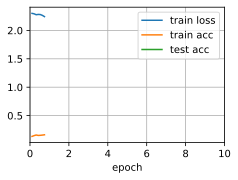

In [25]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 96)
train_ch6(net, train_iter, test_iter, num_epochs, lr)

#### Recap

- The Inception Block is equivalent to a subnetwork with four paths. It extracts information in parallel through convolutional layers of different window shapes and maximum pooling layers. 1 x 1 convolutions reduce channel dimensionality on a per-pixel level. Max-pooling reduces the resolution.

- GoogLeNet connects multiple well-designed Inception blocks with other layers in series. The ratio of the number of channels assigned in the Inception block is obtained through a large number of experiments on the ImageNet dataset.

- GoogLeNet, as well as its succeeding versions, was one of the most efficient models on ImageNet, providing similar test accuracy with lower computational complexity.

## 7.5 Batch Normalization

Training deep neural nets is difficult. And getting them to converge in a reasonable amount of time can be tricky.
In this section, we describe batch normalization (BN) (Ioffe & Szegedy, 2015), a popular and effective technique that consistently accelerates the convergence of deep nets. Together with residual blocks, BN has made it possible for practitioners to routinely train networks with over 100 layers.


#### 7.5.1 Training Deep Networks

To motivate batch normalization, let's review a few practical challenges that arise when training ML models and neural nets in particular.

- 1) **Choices regarding data preprocessing often make an enormous difference in the final results. Recall our application of multilayer perceptrons to predicting house prices (Kaggle dataset). Our first step when working with real data was to standardize our input features to each have a mean of zero and variance of one. Intuitively, this standardization plays nicely with our optimizers because it puts the parameters a-priori at a similar scale.**

- 2) For a typical MLP or CNN, as we train, the activations in intermediate layers may take values with widely varying magnitudes - both along the layers from the input to the output, across nodes in the same layer, and over time due to our updates to the model's parameters. The inventors of batch normalization postulated informally that **this drift in the distribution of activations could hamper the convergence of the network**. Intuitively, we might conjecture that if one layer has activation values that are 100x that of another layer, this might necessitate compensatory adjustments in the learning rates.

- 3) Deeper networks are complex and easily capable of overfitting. This means that regularization becomes more critical.

Batch normalization is applied to individual layers (optionally, to all of them) and works as follows: **in each training iteration, for EACH LAYER, we first compute its activations as usual. Then, we normalize the activations of each node by subtracting its mean and dividing by its standard deviation estimating both quantitites based on the statistics of the current minibatch**. It is precisely due to this normalization based on batch statistics that batch normalization derives its name.

Note that if we tried to apply BN with minibatches of size 1, we would not be able to learn anything. That is because after subtracting the means, each hidden node would take value 0! As you might guess, since we are devoting a whole section to BN, with large enough minibatches, the approach proves effective and stable. One takeaway here is that when applying BN, the choice of minibatch size may even be more significant than without BN.

Formally, BN transforms the activations at a given layer **x** according to the following expression

$BN(x) = \gamma \odot \frac{x - \hat{\mu}}{\hat{\sigma}} + \beta$

Here, $\hat{\mu}$ is the **minibatch sample mean** and $\hat{\sigma}$ is the minibatch sample variance. **After applying BN, the resulting minibatch of activations has zero mean and unit variance**. Because the choice of unit variance (vs some other magic number) is an arbitrary choice, we commonly include coordinate-wise scaling coefficients $\gamma$ and offsets $\beta$. Consequently, the activation magnitudes for intermediate layers cannot diverge during training because BN actively centers and rescales them back to a given mean and size (via $\mu$ and $\sigma$). **One piece of practitioner's intuition/wisdom is that BN seems to allow for more aggressive learning rates**.

Formally, denoting a particular minibatch by $B$, we calculate $\hat{\mu}_B$ and $\hat{\sigma}_B$ as follows:

$\hat{\mu}_B \leftarrow \frac{1}{|B|} \sum{x}$ and $\hat{\sigma}^2_B \leftarrow \frac{1}{|B|} \sum{(x - \mu_B)^2} + \epsilon$


Note that we add a small constant ε > 0 to the variance estimate to ensure that we never attempt division by zero, even in cases where the empirical variance estimate might vanish. The estimates μˆB and σˆB counteract the scaling issue by using noisy estimates of mean and variance. You might think that this noisiness should be a problem. As it turns out, this is actually beneficial.

This turns out to be a recurring theme in deep learning. For reasons that are not yet well-characterized theoretically, **various sources of noise in optimization often lead to faster training and less overfitting**. While traditional machine learning theorists might buckle at this characterization, this variation appears to act as a form of regularization. In some preliminary research, (Teye et al., 2018) and (Luo et al., 2018) relate the properties of BN to Bayesian Priors and penalties respectively. In particular, this sheds some light on the puzzle of why BN works best for moderate minibatches sizes in the 50–100 range.

Fixing a trained model, you might (rightly) think that we would prefer to use the entire dataset to estimate the mean and variance. Once training is complete, why would we want the same image to be classified differently, depending on the batch in which it happens to reside? **During training, such exact calculation is infeasible because the activations for all data points change every time we update our model**. However, once model is trained, we can calculate the means and variances of each layer's activations based on the entire dataset. Indeed this is standard practice for models employing batch normalization and thus MXNet's BN layers function differently in training mode (normalizing by minibatch statistics) and in prediction mode (normalizing by DATASET STATISTICS)

So, how does batch normalization work in practice?

#### 7.5.2 Batch Normalization Layers


**Batch normalization implementations for fully-connected layers and convolutional layers are slightly different**. We discuss both cases below. Recall that one key differences between BN and other layers is that because BN operates on a full minibatch at a time, we cannot just ignore the batch dimension as we did before when introducing other layers.

#### Fully-Connected Layers

**When applying BN to fully-connected layers, we usually INSERT BN AFTER THE AFFINE TRANSFORMATION AND BEFORE THE NONLINEAR ACTIVATION FUNCTION**. Denoting the input to the layer by **x**, the linear transform (with weights $\theta$) by $f_\theta(\cdot)$, the activation function by $\nu(\cdot)$, and the BN operation with parameters $\beta$ and $\gamma$ by $BN_{\beta, \gamma}$, we can express the computation of a BN-enabled, fully-connected layer **h** as follows:

**h** = $\nu(BN_{\beta, \gamma}(f_\theta(x)))$

Recall that mean and variance are computed on the *same* minibatch B on which the transformation is applied. **Also recall that the scaling coefficient $\gamma$ and the offset $\beta$ are parameters that need to be learned jointly with the more familiar parameters $\theta$**

#### Convolutional Layers

Similarly, with convolutional layers, we typically apply BN after the convolution and before the nonlinear activation function. **When the convolution has multiple output channels, we need to carry out batch normalization for each of the outputs of these channels, and each channel has its own scale and shift parameters, both of which are scalars**. Assume that our minibatches contain m each and that for each channel, the output of the convolution has height p and width q. For convolutional layers, we carry out each batch normalization over the m · p · q elements per output channel simultaneously. Thus we collect the values over all spatial locations when computing the mean and variance and consequently (within a given channel) apply the same μˆ and σˆ to normalize the values at each spatial location.

#### Batch Normalization During Prediction

As we mentioned earlier, BN typically behaves differently in training mode and prediction mode. **First, the noise in $\mu$ and $\sigma$ arising from estimating each on minibatches are no longer desirable** once we have trained the model. Second, we might not have the luxury of computing per-batch normalization statistics, e.g., we might need to apply our model to make one prediction at a time.

Typically, after training, **we use the entire dataset to compute stable estimates of the activation statistics and then fix them at prediction time**. Consequently, BN behaves differently during training and at test time. **Recall that dropout also exhibits this characteristic**.

#### 7.5.3 Implementation from Scratch

In [8]:
import d2l
from mxnet import autograd, np, npx, init, gluon
from mxnet.gluon import nn

npx.set_np()

In [3]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use autograd to determine whether the current mode is training mode or
    # prediction mode
    if not autograd.is_training():
        # If it is in PREDICTION mode, directly use the mean and variance
        # obtained from the incoming moving average
        X_hat = (X - moving_mean) / np.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully-connected layer, calculate the mean and variance
            # on the FEATURE dimension
            mean = X.mean(axis = 0)
            var = ((X - mean) ** 2).mean(axis = 0)
        else:
            # When using a 2D convolutional layer, calculate the mean and variance
            # on the channel dimension (axis = 1). Here we need to maintain the shape
            # of X, so that the broadcast operation can be carried out later
            mean = X.mean(axis = (0, 2, 3), keepdims = True)
            var = ((X - mean) ** 2).mean(axis = (0, 2, 3), keepdims = True)
        # In training mode, the current mean and variance are used for the
        # standardization
        X_hat = (X - mean) / np.sqrt(var + eps)
        # Update the mean and variance of the moving average
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta # scale and shift
    return Y, moving_mean, moving_var

We can now create a proper BatchNorm layer. Our layer will maintain proper parameters corresponding for scale `gamma` and shift `beta`, both of which will be updated in the course of the training. Additionally, our layer **will maintain a moving average of the means and variances for subsequent use during model prediction**. The `num_features` parameter required by the `BatchNorm` instance **is the number of outputs for a fully-connected layer and the number of output channels for a Conv layer**. The `num_dims` parameter also required by this instance is 2 for a fully-connected layer and 4 cor a convolutional layer.

Putting aside the algorithmic details, note the design pattern underlying our implementation of the layer. **Typically, we define the math in a separate function, say batch_norm. We then integrate this functionality into a custom layer, whose code mostly addresses bookkeeping matters, such as moving data to the right device context, allocating and initializing any required variables, keeping track of running averages (here for mean and variance), etc**. This pattern enables a clean separation of math from boilerplate code. **Also note that for the sake of convenience we did not worry about automatically inferring the input shape here, thus our need to specify the number of features throughout**. Do not worry, the Gluon BatchNorm layer will care of this for us.

In [4]:
class BatchNorm(nn.Block):
    def __init__(self, num_features, num_dims, **kwargs):
        super(BatchNorm, self).__init__(**kwargs)
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter involved in gradient finding
        # and iteration are initialized to 1 and 0 respectively
        self.gamma = self.params.get('gamma', shape = shape, init = init.One())
        self.beta = self.params.get('beta', shape = shape, init = init.Zero())
        # All the variables not involved in gradient finding and iteration are
        # initialized to 0 on the CPU
        self.moving_mean = np.zeros(shape)
        self.moving_var = np.zeros(shape)
    
    def forward(self, X):
        # If X is not on the CPU, copy moving_mean and moving_var to the device
        # where X is located
        if self.moving_mean.context != X.context:
            self.moving_mean = self.moving_mean.copyto(X.context)
            self.moving_var = self.moving_var.copyto(X.context)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(X, self.gamma.data(),
                                                         self.beta.data(),
                                                         self.moving_mean,
                                                         self.moving_var, eps = 1e-12,
                                                         momentum = 0.9)
        return Y

#### 7.5.4 Using a Batch Normalization LeNet

To see how to apply `BatchNorm` in context, below we apply it to a traditional LeNet model. **Recall that BN is typically applied after the convolutional layers and fully-connected layers, but before the corresponding activation functions.**

In [5]:
net = nn.Sequential()
net.add(nn.Conv2D(6, kernel_size = 5),
        BatchNorm(6, num_dims = 4),
        nn.Activation('sigmoid'),
        nn.MaxPool2D(pool_size = 2, strides = 2),
        nn.Conv2D(16, kernel_size = 5),
        BatchNorm(16, num_dims=4),
        nn.Activation('sigmoid'),
        nn.MaxPool2D(pool_size=2, strides = 2),
        nn.Dense(120),
        BatchNorm(120, num_dims=2),
        nn.Activation('sigmoid'),
        nn.Dense(84),
        BatchNorm(84, num_dims=2),
        nn.Activation('sigmoid'),
        nn.Dense(10))

loss 0.250, train acc 0.909, test acc 0.874
410.2 examples / sec on cpu(0)


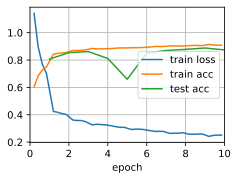

In [11]:
lr, num_epochs, batch_size = 1.0, 10, 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_ch6(net, train_iter, test_iter, num_epochs, lr)

#### 7.5.5 Concise Implementation

Compared with the BatchNorm class, which we just defined ourselves, the BatchNorm class defined by the nn model in Gluon is easier to use. **In Gluon, we do not have to worry about num_features or num_dims. Instead, these parameter values will be inferred automatically via delayed initialization**. Otherwise, the code looks virtually identical to the application our implementation above.

In [12]:
net = nn.Sequential()
net.add(nn.Conv2D(6, kernel_size = 5),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.MaxPool2D(pool_size = 2, strides = 2),
        nn.Conv2D(16, kernel_size = 5),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.MaxPool2D(pool_size=2, strides = 2),
        nn.Dense(120),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.Dense(84),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.Dense(10))

#### Recap

- During model training, batch normalization continuously adjusts the intermediate output of the neural network by **utilizing the mean and standard deviation of the minibatch**, so that the values of the intermediate output in each layer throughout the neural network are more stable.

- The batch normalization methods for fully-connected layers and convolutional layers are slightly different

- **Like a dropout layer, batch normalization layers have different computation results in training mode and prediction mode**.

- Batch Normalization has many beneficial side effects, primarily that of regularization. On the other hand, the original motivation of reducing covariate shift seems not be a valid explanation.

## 7.6 Residual Networks (ResNet)

As we design increasingly deeper networks it becomes imperative to understand how adding layers can increase the complexity and expressiveness of the network. **Even more important is the ability to design networks where adding layers makes networks strictly more expressive rather than just different**. To make some progress we need a bit of theory.

#### 7.6.1 Function Classes

Consider F, the class of functions that a specific network architecture (together with learning rates and other hyperparameter settings) can reach. That is, for all f ∈ F there exists some set of parameters W that can be obtained through training on a suitable dataset. Letʼs assume that $f^{*}$ is the function that we really would like to find. If it is in F, we are in good shape but typically we will not be quite so lucky.Instead, we will try to find some $f^{*}_F$ which is our best bet within F. For instance, we might try finding it by solving the following optimization problem:

$f^{*}_F = argmin L(X, Y, f)$ subject to $f \in F$

It is only reasonable to assume that if we design a different and more powerful architecture $F^{'}$ we should arrive at a better outcome. In other words, we would expect that $f^{*}_F{'}$  is “better” than $f^{*}_F$ . However,ifF̸⊆F′there is no guarantee that this should even happen. In fact, $f^{*}_F{'}$ might well be worse. This is a situation that we often encounter in practice—**adding layers does not only make the network more expressive, it also changes it in sometimes not quite so predictable ways.**


Only if larger function classes contain the smaller ones are we guaranteed that increasing them strictly increases the expressive power of the network. This is the question that He et al, 2016 considered when working on very deep computer vision models. **At the heart of ResNet is the idea that every additional layer should contain the identity function as one of its elements. This means that if we can train the newly-added layer into an identity mapping $f(x) = x$, the new model will be as effective as the original model**. As the new model may get a better solution to fit the training dataset, the added layer might make it easier to reduce training errors. Even better, the identity function rather than the null $f(x) = 0$ should be the simplest function within a layer.

These considerations are rather profound but they led to a surprisingly simple solution, a residual block. With it, (He et al., 2016a) won the ImageNet Visual Recognition Challenge in 2015. The design had a profound influence on how to build deep neural networks.


ResNet follows VGGʼs full 3 × 3 convolutional layer design. The residual block has two 3 × 3 con- volutional layers with the same number of output channels. Each convolutional layer is followed by a batch normalization layer and a ReLU activation function. Then, we skip these two convolu- tion operations and add the input directly before the final ReLU activation function. This kind of design requires that the output of the two convolutional layers be of the same shape as the input, so that they can be added together. If we want to change the number of channels or the stride, we need to introduce an additional 1 × 1 convolutional layer to transform the input into the desired shape for the addition operation. Letʼs have a look at the code below.

In [13]:
import d2l
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

In [14]:
class Residual(nn.Block):
    def __init__(self, num_channels, use_1x1conv = False, strides = 1, **kwargs):
        super(Residual, self).__init__(**kwargs)
        self.conv1 = nn.Conv2D(num_channels, kernel_size = 3, padding = 1,
                               strides = strides)
        self.conv2 = nn.Conv2D(num_channels, 
                               kernel_size = 3, 
                               padding = 1)
        
        if use_1x1conv:
            self.conv3 = nn.Conv2D(num_channels, kernel_size = 1, strides = strides)
            
        else:
            self.conv3 = None
        
        self.bn1 = nn.BatchNorm()
        self.bn2 = nn.BatchNorm()
        
    def forward(self, X):
        Y = npx.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        return npx.relu(Y + X)

This code generates two types of networks: one where we add the input to the output before applying the ReLU nonlinearity, and whenever `use_1x1conv=True`, one where we adjust channels and resolution by means of a 1 × 1 convolution before adding.

Now let's look at a situation where the input and output are of the same shape.

In [15]:
blk = Residual(3)
blk.initialize()

In [16]:
X = np.random.uniform(size = (4, 3, 6, 6))
blk(X).shape

(4, 3, 6, 6)

We also have the option to halve the output height and width while increasing the number of output channels.

In [17]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk.initialize()
blk(X).shape

(4, 6, 3, 3)

#### 7.6.3 ResNet Model


The first two layers of ResNet are the same as those of the GoogLeNet we described before: the 7×7 convolutional layer with 64 output channels and a stride of 2 is followed by the 3×3 maximum pooling layer with a stride of 2. The difference is the batch normalization layer added after each convolutional layer in ResNet.

In [18]:
net = nn.Sequential()
net.add(nn.Conv2D(64, kernel_size=7, strides = 2, padding = 3),
        nn.BatchNorm(), nn.Activation('relu'),
        nn.MaxPool2D(pool_size = 3, strides = 2, padding = 1))

GoogLeNet uses four blocks made up of Inception blocks. However, ResNet uses four modules made up of residual blocks, each of which uses several residual blocks with the same number of output channels. The number of channels in the first module is the same as the number of input channels. Since a maximum pooling layer with a stride of 2 has already been used, it is not necessary to reduce the height and width. In the first residual block for each of the subsequent modules, the number of channels **is doubled compared with that of the previous module, and the height and width are halved**. 

Now, let's implement this module. Note that special preprocessing has been performed on the first module.

In [20]:
def resnet_block(num_channels, num_residuals, first_block = False):
    blk = nn.Sequential()
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.add(Residual(num_channels, use_1x1conv=True, strides = 2))
        else:
            blk.add(Residual(num_channels))
    return blk

Then, we add all the residual blocks to ResNet. Here, two residual blocks are used for each module.

In [21]:
net.add(resnet_block(64,  2, first_block=True),
        resnet_block(128, 2),
        resnet_block(256, 2),
        resnet_block(512, 2))

Finally, just like GoogLeNet, we add a global average pooling layer, followed by the fully-connected layer output.

In [22]:
net.add(nn.GlobalAvgPool2D(), nn.Dense(10))

There are 4 convolutional layers in each module (excluding the 1 × 1 convolutional layer). To- gether with the first convolutional layer and the final fully connected layer, there are 18 layers in total. Therefore, this model is commonly known as ResNet-18. By configuring different numbers of channels and residual blocks in the module, we can create different ResNet models, such as the deeper 152-layer ResNet-152. Although the main architecture of ResNet is similar to that of GoogLeNet, ResNetʼs structure is simpler and easier to modify. All these factors have resulted in the rapid and widespread use of ResNet.

Before training ResNet, letʼs observe how the input shape changes between different modules in ResNet. As in all previous architectures, the resolution decreases while the number of channels increases up until the point where a global average pooling layer aggregates all features.

In [23]:
X = np.random.uniform(size = (1, 1, 224, 224))
net.initialize()

for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv9 output shape:	 (1, 64, 112, 112)
batchnorm12 output shape:	 (1, 64, 112, 112)
relu0 output shape:	 (1, 64, 112, 112)
pool4 output shape:	 (1, 64, 56, 56)
sequential3 output shape:	 (1, 64, 56, 56)
sequential4 output shape:	 (1, 128, 28, 28)
sequential5 output shape:	 (1, 256, 14, 14)
sequential6 output shape:	 (1, 512, 7, 7)
pool5 output shape:	 (1, 512, 1, 1)
dense6 output shape:	 (1, 10)


#### 7.6.4 Data Acquisition and Training


We train ResNet on the Fashion-MNIST dataset, just like before. **The only thing that has changed is the learning rate that decreased again, due to the more complex architecture.**

In [25]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

#### Recap

- Residual Blocks allow for a parametrization relative to the identity function $f(x) = x$

- Adding residual blocks increases the function complexity in a well-defined manner

- We can train an effective deep neural network by having residual blocks pass through cross-layer data channels

- ResNet had a major influence on the design of subsequent deep neural networks, both for convolutional and sequential nature.

## 7.7 Densely Connected Networks (DenseNet)

ResNet significantly changed the view of how to parametrize the functions in deep networks. DenseNet is to some extent the logical extension of this. To understand how to arrive at it, let's take a small detour to theory. Recall the Taylor expansion for functions. For scalars it can be written as:

$f(x) = f(0) + f^{'}(x)x + \frac{1}{2}f^{''}(x)x^2 + \frac{1}{6}f^{'''}(x)x^3 + o(x^3)$

#### 7.7.1 Function Decomposition

The key takeaway here is that it decomposes the function into increasingly higher order terms. In a similar vein, ResNet decomposes functions into:

$f(\textbf{x}) = \textbf{x} + g(\textbf{x})$

That is, ResNet decomposes $f$ into a simple linear term and a more complex nonlinear one. What if we want to go beyond two terms? A solution was proposed by (Huang et al., 2017) in the form of DenseNet, an architecture that reported record performance on the ImageNet dataset.

The main difference between ResNet and DenseNet in cross-layer connections: use of addition and use of concatenation.

As shown in Fig. 7.7.1 in the book, the key difference between ResNet and DenseNet **is that in the latter case outputs are concatenated rather than added**. As a result we perform a mapping from x to its values after applying an increasingly complex sequence of functions.


In the end, all these functions are combined in an MLP to reduce the number of features again. In terms of implementation this is quite simple - rather than adding terms, we concatenate them. The name DenseNet arises from the fact that the dependency graph between variables becomes quite dense. The last layer of such a chain is densely connected to all previous layers. The main components that compose a DenseNet are dense blocks and transition layers. **The former defines how the inputs and outputs are concatenated**, while the latter controls the number of channesl so that it is not too large.

#### 7.7.2 Dense Blocks

DenseNet uses the modified "batch normalization, activation, and convolution" architecture of ResNet. First, we implement this architecture in the `conv_block` function.

In [325]:
import d2l
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

In [326]:
def conv_block(num_channels):
    blk = nn.Sequential()
    blk.add(nn.BatchNorm(),
            nn.Activation('relu'),
            nn.Conv2D(num_channels, kernel_size=3, padding=1))
    
    return blk

A dense block consists of multiple `conv_block` units, **each using the same number of output channels**. In the forward computation, however, we concatenate the input and output of each block on the channel dimension.

In [327]:
class DenseBlock(nn.Block):
    def __init__(self, num_convs, num_channels, **kwargs):
        super(DenseBlock, self).__init__(**kwargs)
        self.net = nn.Sequential()
        
        for _ in range(num_convs):
            self.net.add(conv_block(num_channels))
            
    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate the input and output of each block on the channel
            # dimension
            X = np.concatenate((X, Y), axis = 1)
            
        return X

In the following example, we define a convolution block with two blocks of 10 output channels. When using an input with 3 channels, we will get an output with the 3 + 2 * 10 = 23. The number of convolution block channels controls the increase in the number of output channels relative to the number of input channels. This is also referred to as the growth rate.

In [328]:
blk = DenseBlock(2, 10)
blk.initialize()
X = np.random.uniform(size = (4,3,8,8))
Y = blk(X)
Y.shape

(4, 23, 8, 8)

#### 7.7.3 Transition Layers

Since each dense block will increase the number of channels, adding too many of them will lead to an excessively complex model. **A transition layer is used to control the complexity of the model. It reduces the number of channels by using the 1 × 1 convolutional layer and halves the height and width of the average pooling layer with a stride of 2, further reducing the complexity of the model.**

In [331]:
def transition_block(num_channels):
    blk = nn.Sequential()
    blk.add(nn.BatchNorm(), nn.Activation('relu'),
            nn.Conv2D(num_channels, kernel_size=1),
            nn.AvgPool2D(pool_size=2, strides = 2))
    return blk

In [332]:
blk = transition_block(10)
blk.initialize()
blk(Y).shape

(4, 10, 4, 4)

#### 7.7.4 DenseNet Model

Next, we will construct a DenseNet model. DenseNet first uses the same single convolutional layer and maximum pooling layer as ResNet.

In [333]:
net = nn.Sequential()
net.add(nn.Conv2D(64, kernel_size=7, strides = 2, padding=3),
        nn.BatchNorm(), nn.Activation('relu'),
        nn.MaxPool2D(pool_size=3, strides = 2, padding = 1))

Then, similar to the four residual blocks that ResNet uses, DenseNet uses four dense blocks. Similar to ResNet, we can set the number of convolutional layers used in each dense block. Here, we set it to 4, consistent with the ResNet-18 in the previous section. Furthermore, we set the number of channels (i.e., growth rate) for the convolutional layers in the dense block to 32, so 128 channels will be added to each dense block.

In ResNet, the height and width are reduced between each module by a residual block with a stride of 2. Here, we use the transition layer to halve the height and width and halve the number of channels.

In [334]:
# Num_channels: the current number of channels
num_channels, growth_rate = 64, 32
num_convs_in_dense_blocks = [4,4,4,4]

for i, num_convs in enumerate(num_convs_in_dense_blocks):
    net.add(DenseBlock(num_convs, growth_rate))
    # This is the number of output channels in the previous dense block
    num_channels += num_convs * growth_rate
    # A transition layer that halves the number of channels is added between the 
    # dense blocks
    if i != len(num_convs_in_dense_blocks) - 1:
        num_channels //=2
        net.add(transition_block(num_channels))

Similar to ResNet, a global pooling layer and fully-connected layer are connected at the end to produce the output.

In [335]:
net.add(nn.BatchNorm(),
        nn.Activation('relu'),
        nn.GlobalAvgPool2D(),
        nn.Dense(10))

#### 7.7.5 Data Acquisition and Training

Since we are using a deeper network here, in this section, we will reduce the input height and width from 224 to 96 to simplify the computation.

In [337]:
lr, num_epochs, batch_size = 0.1, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

#### Recap

- In terms of cross-layer connections, unlike ResNet, where inputs and outputs are added together, DenseNet concatenates inputs and outputs on the channel dimension

- The main units that compose DenseNet are dense blocks and transition layers.

- We need to keep the dimensionality under control when composing the network by adding transition layers that shrink the number of channels again.